In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [36]:
dataset = datasets.make_blobs(n_samples=100 , n_features=2 , centers=[[5,5], [200,200]] , cluster_std=50)
# data , data[1]
data = dataset[0]
labels = dataset[1]

<Axes: >

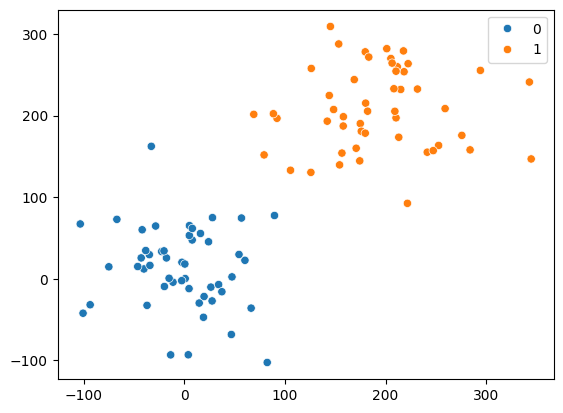

In [41]:
sns.scatterplot(x= data[:,0] , y = data[:,1] , hue = labels)

In [38]:
minx = min(data[:,0])
maxx = max(data[:,0])
x = np.linspace(minx , maxx , 200)
# x

In [75]:
def plotline(w , w0 , x , y):
    w1 = w[0]
    w2 = w[1]
    slope = -w1/w2 
    intercept = -w0/w2
    slope , intercept

    y = slope * x + intercept
    plt.plot(x , y , label = 'Decision Line' , color = 'red' , linestyle = '-.')
    plt.legend()
    plt.show()


w = np.random.randint(20000 , size= 2)
w0 = np.random.randint(20000)

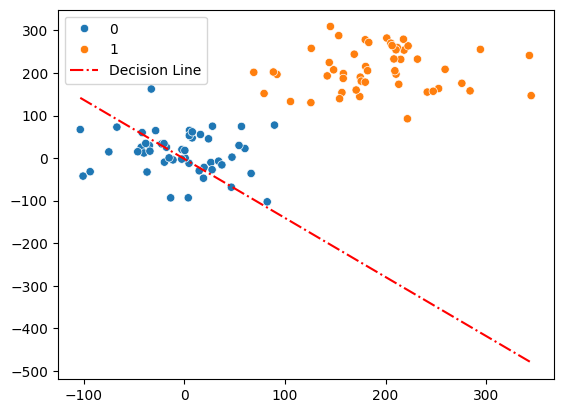

In [76]:
sns.scatterplot(x = data[:,0] , y = data[:,1] , hue = labels)
plotline(w , w0 , x, y )

In [ ]:
def distance(w , w0 , x):
    distance = w @ x + w0 / np.linalg.norm(w)
    return distance